### 시간 시각화
#### 연속형 시간 시각화로 흔히 사용하는 선그래프는 시간 간격 밀도가 높을 때 사용 but, 양이 너무 많거나 변동이 심하면 트렌드나 패턴을 확인하기 어려움                            -> 추세선을 삽입하여 전체적인 경향이나 패턴을 쉽게 파악
#### 추세선을 그리는 가장 일반적인 방법은 이동평균 방법을 사용하는 것;=데이터의 연속적 그룹의 평균을 구하는 것
#### 누적 막대그래프는 한 시점에 2개 이상의 세부 항목이 존재할 때 사용한다. 

In [1]:
# 필요한 패키지 설치

import matplotlib.pyplot as plt
import pandas as pd
import datetime
plt.rcParams['figure.dpi'] = 300

In [3]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/superstore.csv")

# 데이터 샘플 확인
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# date 컬럼 날짜형식 변환
df['Date2']= pd.to_datetime(df['Order Date'], infer_datetime_format=True) 
# 날짜 오름차순 정렬
df = df.sort_values(by='Date2')
# 연도 컬럼 생성
df['Year'] = df['Date2'].dt.year

## 선 그래프 용 데이터셋 생성
# 2018년 데이터만 필터링
df_line=df[df.Year == 2018]

# 2018년 일 별 매출액 가공
df_line = df_line.groupby('Date2')['Sales'].sum().reset_index()

df_line.head()

C:\Users\qorud\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/04/2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\qorud\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '22/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\qorud\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/05/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\qorud\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '27/08/2015' in DD/MM/YYYY format. Provide format or specif

,Date2,Sales
0,2018-01-01,1481.828
1,2018-01-04,5972.988
2,2018-01-05,4108.370
3,2018-01-06,586.042
4,2018-01-07,639.830


#### 위 코드는 선그래프 시각화에 앞서 일자별 매출액 데이터를 가공해 준다. 우선 기존 order Date 칼럼을 날짜 형식으로 변환하고 연도 구분 칼럼을 생성해 준다. 그리고 2018년도 데이터만 필터링한다. 마지막으로 groupby() 함수를 사용하여 일별 매출액을 가공해 준다. 출력된 데이터셋에서 일자별로 매출액 합계가 집계된 것을 확인 가능하다.

In [5]:
df['Date2']

540    2015-01-02
5713   2015-01-03
157    2015-01-03
6548   2015-01-03
7949   2015-01-03
          ...    
908    2018-12-30
645    2018-12-30
907    2018-12-30
906    2018-12-30
1297   2018-12-30
Name: Date2, Length: 9800, dtype: datetime64[ns]

<AxesSubplot:xlabel='Date2'>

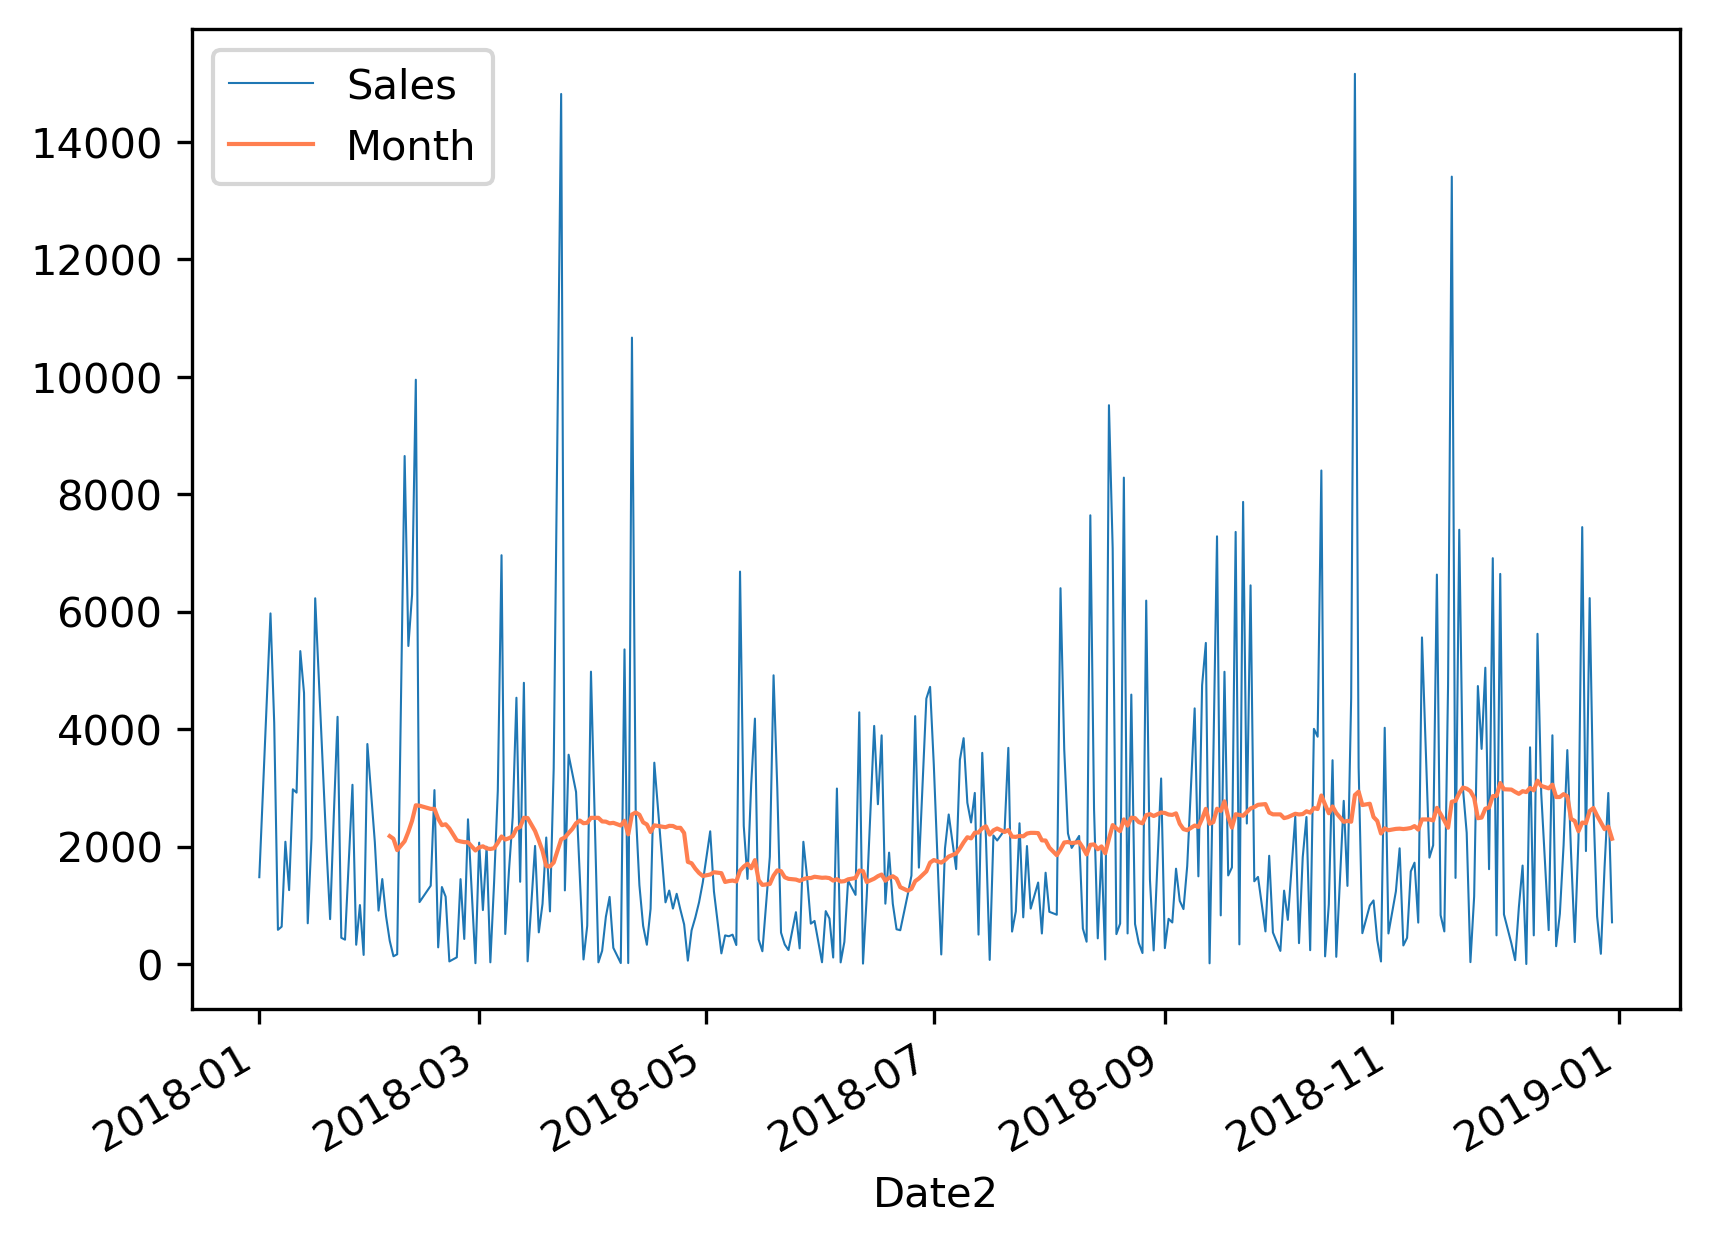

In [6]:
# 30일 이동평균 생성
df_line['Month'] = df_line['Sales'].rolling(window=30).mean()

# 선 그래프 시각화
ax = df_line.plot(x='Date2', y='Sales',linewidth = "0.5")
df_line.plot(x='Date2', y='Month', color='#FF7F50', linewidth = "1", ax=ax)

#### 앞서 가공한 데이터셋을 활용하여 선그래프를 시각화한다. 30일 이동평균선을 삽입하기 위해 rolling() 함수를 사용하여 month 칼럼을 새롭게 만들어준다. 그 다음 plot() 함수를 통해 선그래프를 생성한다. 2018년도의 일자별 매출액이 잘 나타나는 것을 확인할 수 있다. but 매출액 편차가 커서 일 매출 선으로는 전체적인 추이를 가늠하기 힘들다. 이런 경우 앞서 말한 거 처럼 추세선(이동평균선)을 그린다. 이동평균선을 보면 5월부터 매출이 감소했다가 8월 부터 상승하는 모습을 확인할 수 있다.

In [7]:
# 연도 별 판매량 데이터 가공
df_bar_1 = df.groupby('Year')['Sales'].sum().reset_index()

df_bar_1.head()

,Year,Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


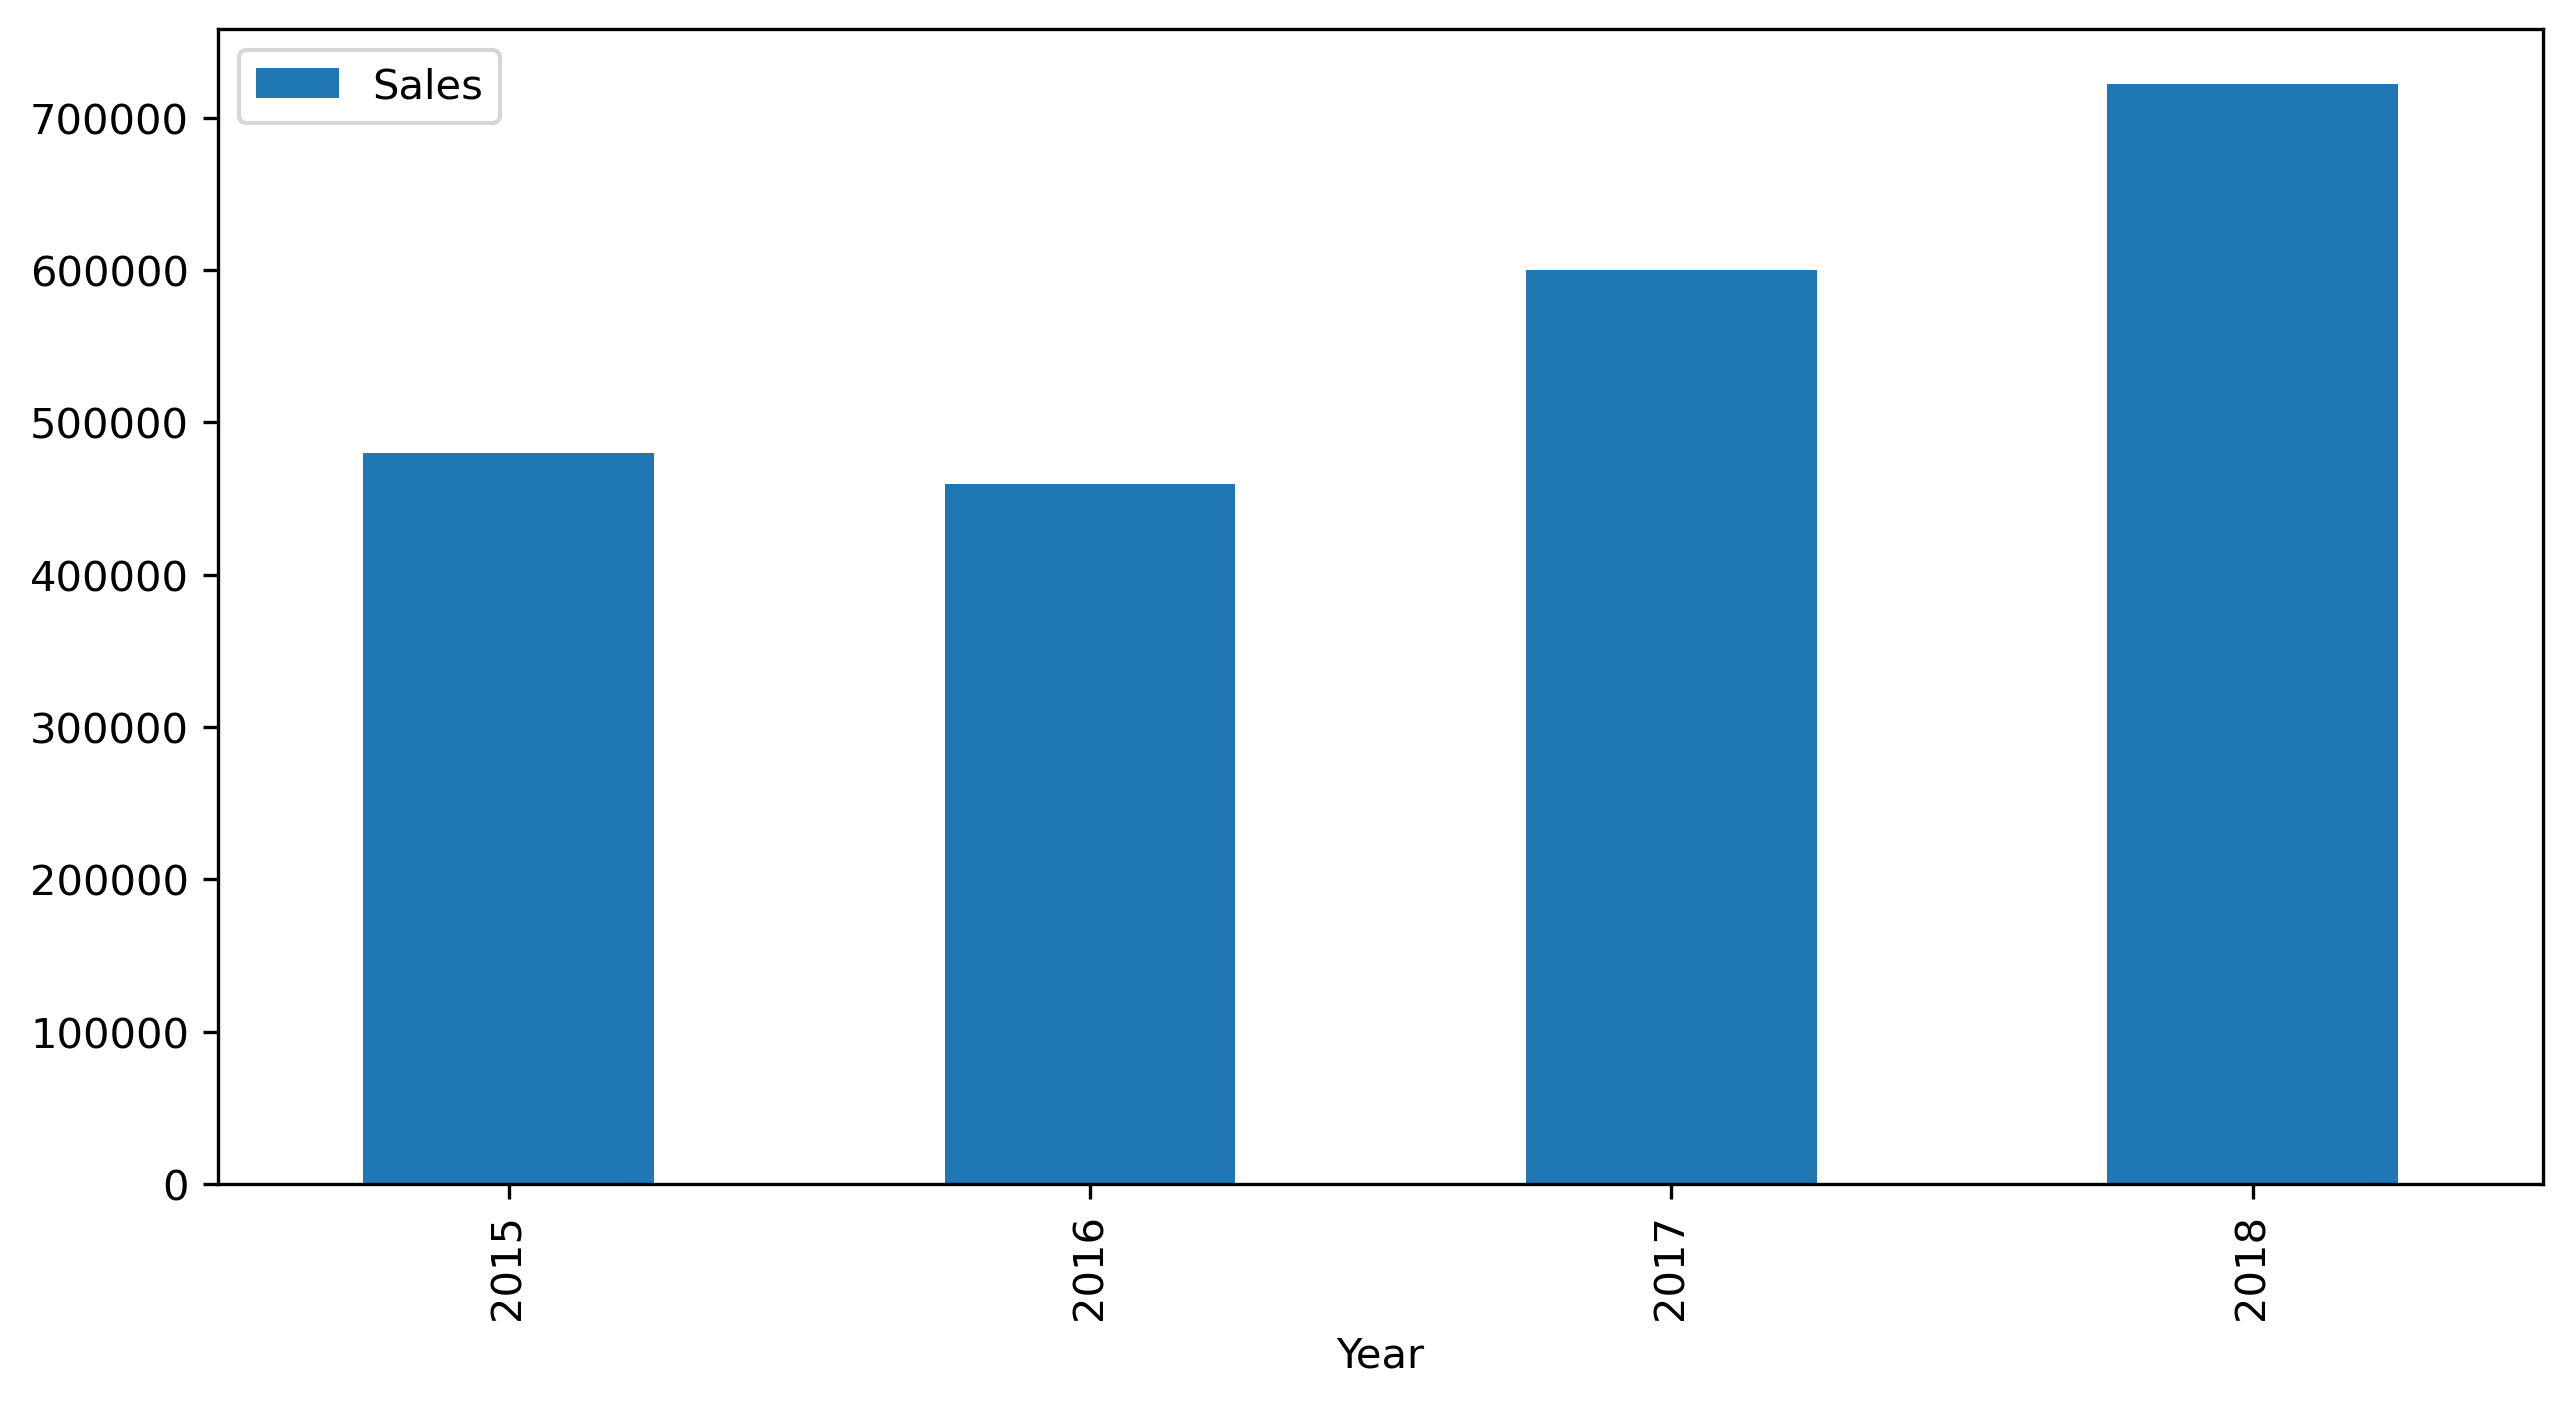

In [8]:
# 연도 별 매출액 막대 그래프 시각화
ax = df_bar_1.plot.bar(x='Year', y='Sales', rot=90, figsize=(10,5))

In [9]:
#연도별, 고객 세그먼트 별 매출액 데이터 가공
df_bar_2 = df.groupby(['Year', 'Segment'])['Sales'].sum().reset_index()

# 고객 세그먼트를 컬럼으로 피벗
df_bar_2_pv = df_bar_2.pivot(index='Year', 
                             columns='Segment', 
                             values='Sales').reset_index()

df_bar_2_pv.head()

Segment,Year,Consumer,Corporate,Home Office
0,2015,262956.8006,127797.4957,89101.9118
1,2016,265356.2933,119675.5989,74404.1132
2,2017,291142.9652,204977.3178,104072.2670
3,2018,328604.4719,236043.6624,157403.8849


<AxesSubplot:xlabel='Year'>

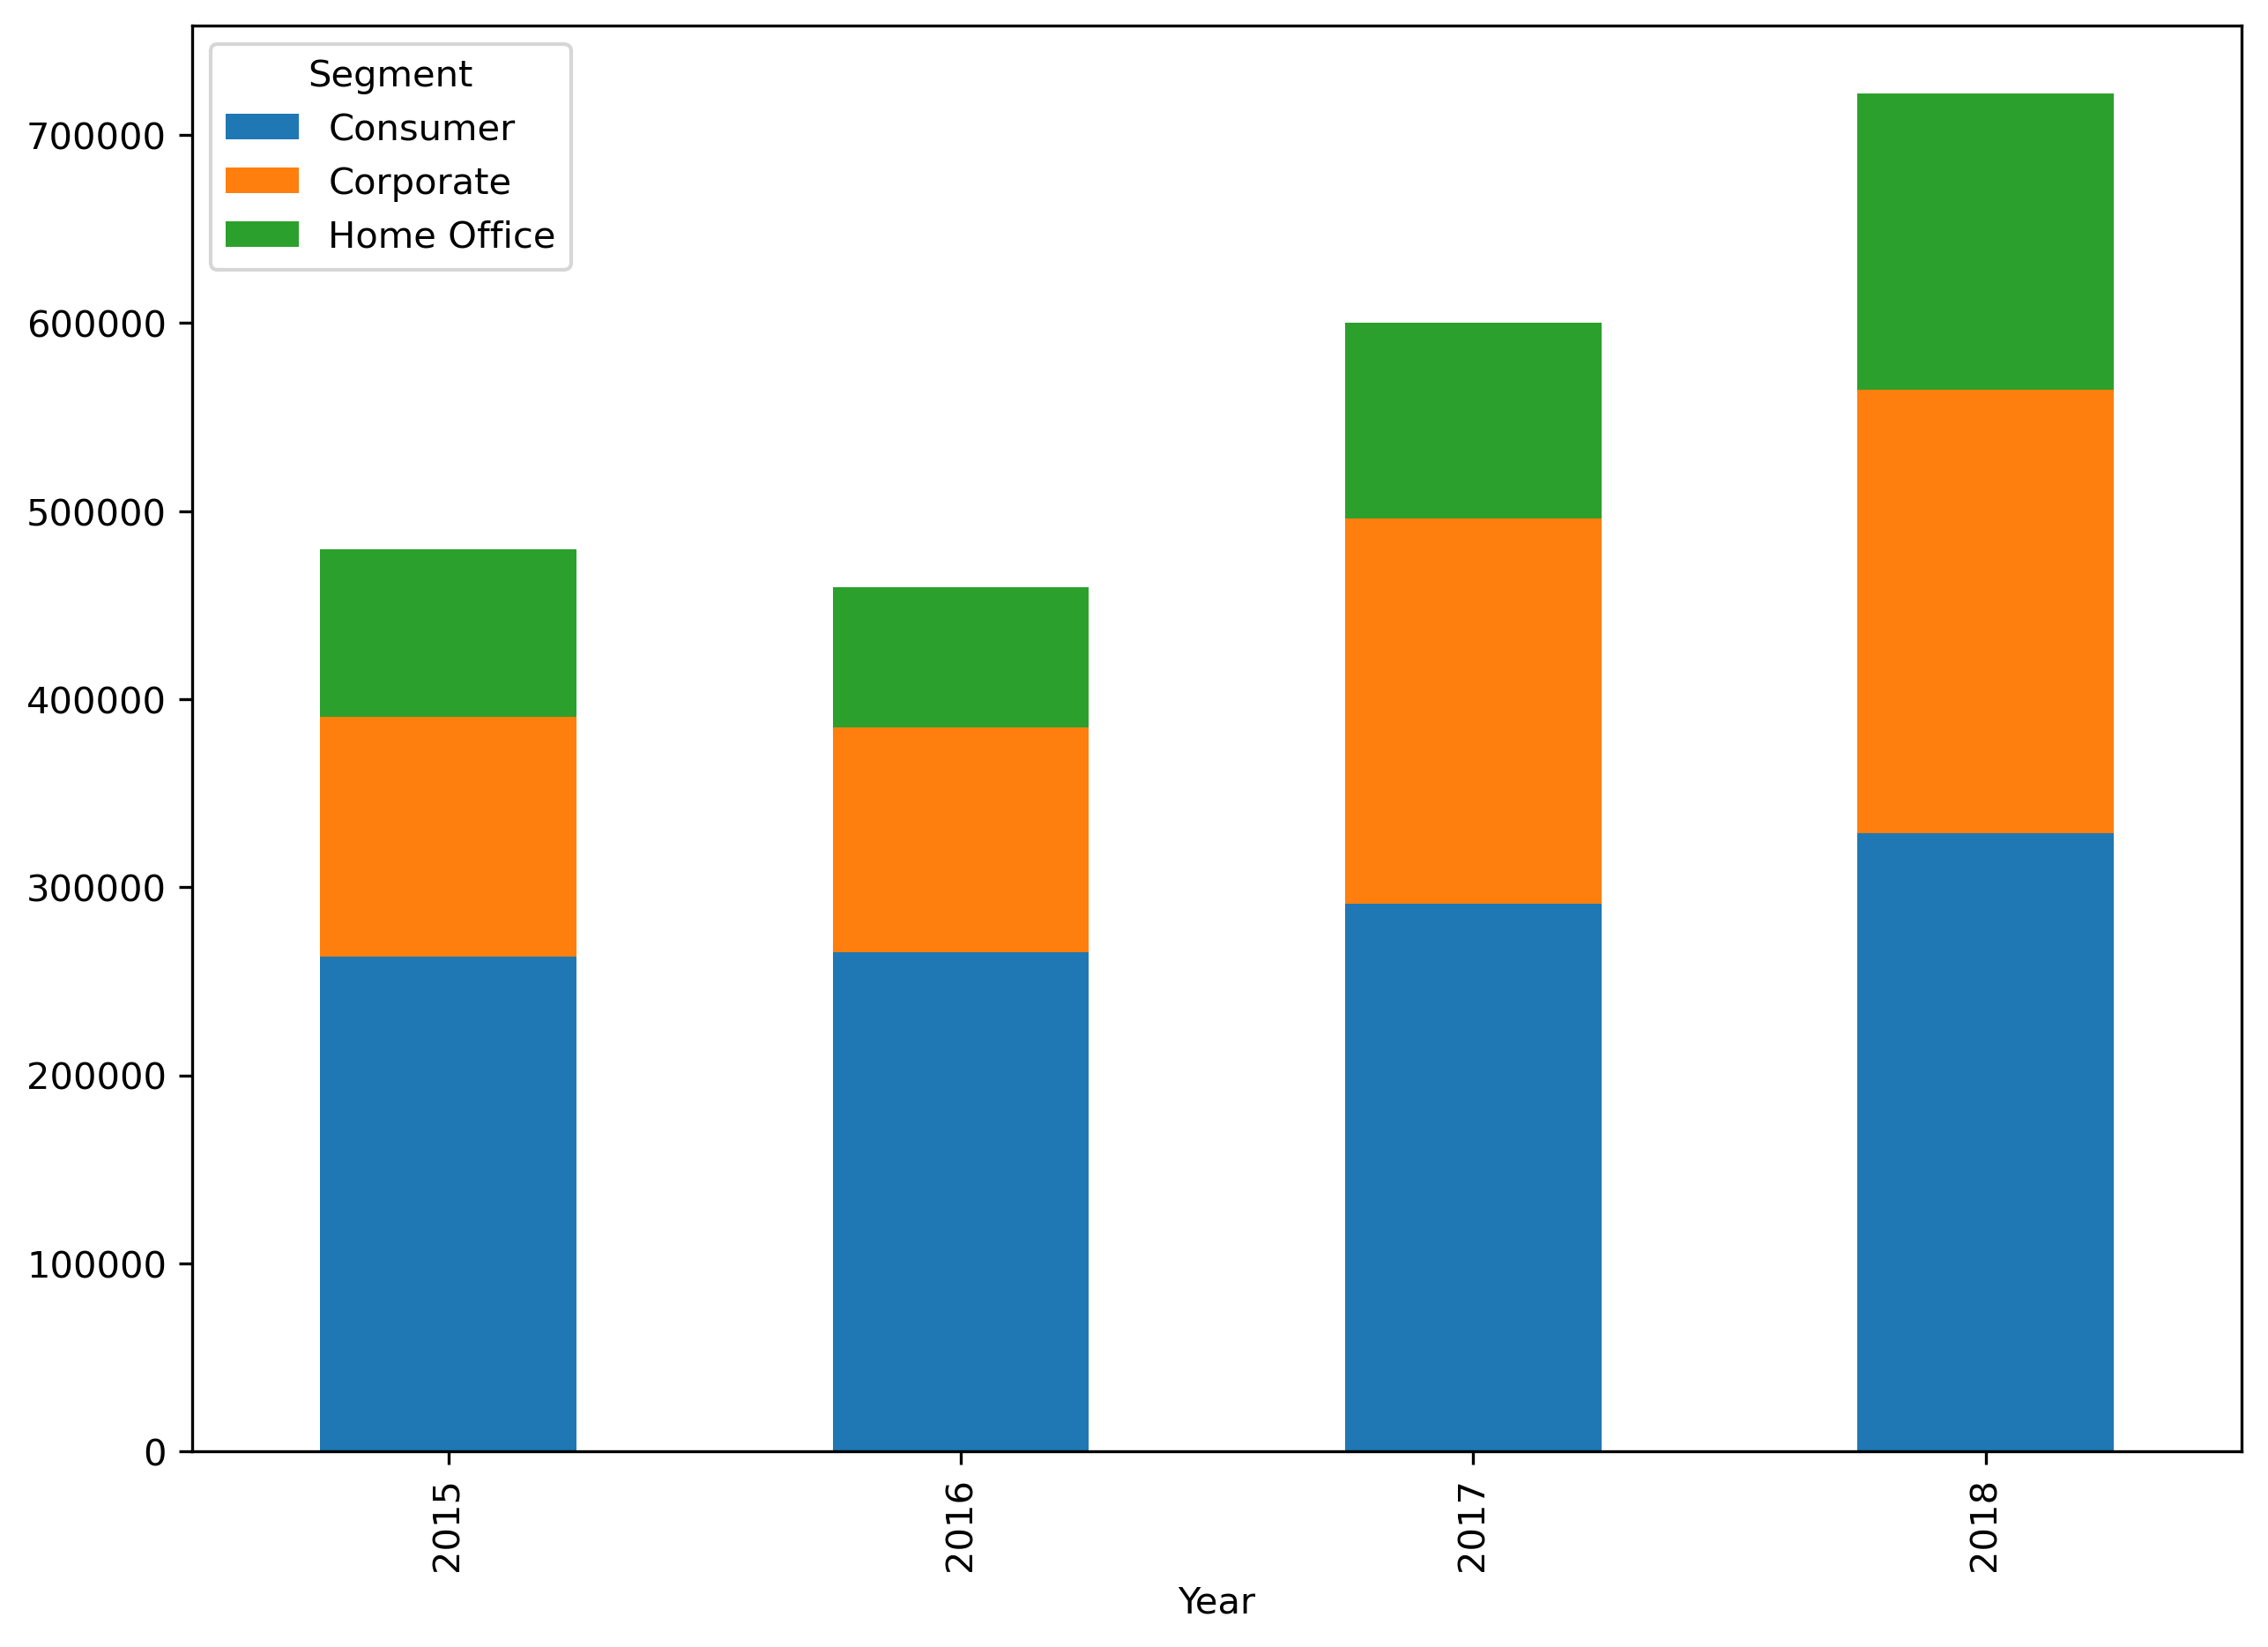

In [10]:
# 연도 별 고객 세그먼트 별 매출액 누적 막대 그래프 시각화
df_bar_2_pv.plot.bar(x='Year', stacked=True, figsize=(10,7))

#### 매출액은 앞선 단순 막대그래프와 동일하지만 세 가지 세그먼트의 각 매출액이 구분되어 표현된 것을 확인할 수 있다. 이를 통해 각 연도에서 세그먼트별 매출액 비중이 어느 정도 되는지 파악할 수 있다. 만약 stacked 옵션을 FALSE로 주면 각 연도별로 세게의 막대 그래프가 나오도록 표현된다.